### Using the dataset to train a model

In [1]:
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# neural neworks
import tensorflow.keras as kr

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<AxesSubplot:xlabel='speed', ylabel='power'>

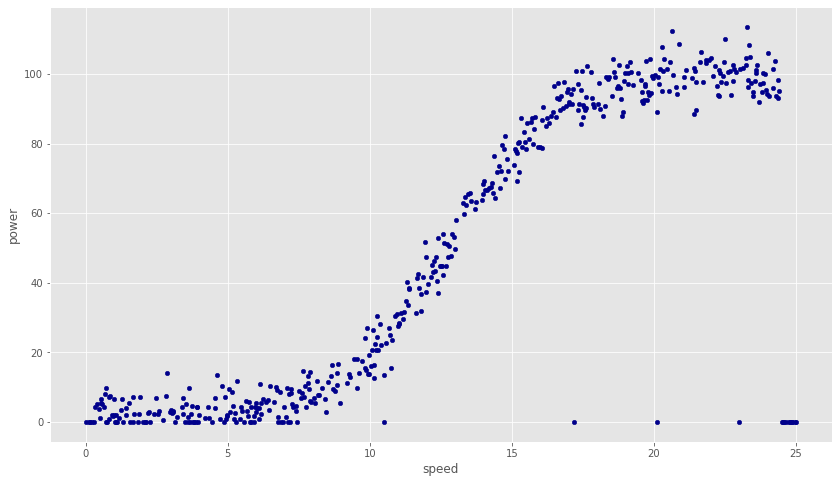

In [3]:
data = pd.read_csv('power_production.csv')
data.plot.scatter(x='speed',
                      y='power',
                      c='DarkBlue')

<AxesSubplot:xlabel='speed', ylabel='power'>

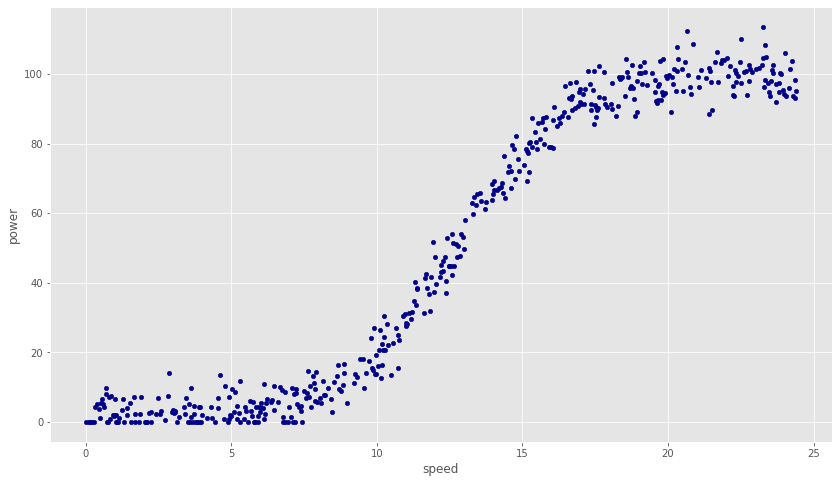

In [4]:
data = pd.read_csv('power_production.csv')
## drop rows where the power putput is zero even though wind speed > 10
df_new = data.drop(data[(data['speed'] > 10.0) & (data['power'] == 0.0)].index)   # https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe
df_new.plot.scatter(x='speed',
                      y='power',
                      c='DarkBlue')

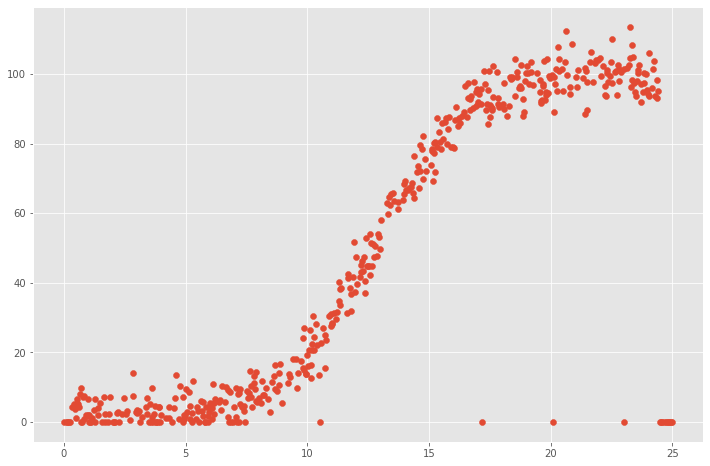

In [5]:
power_data = np.genfromtxt("power_production.csv", delimiter=",", names=["x", "y"])
fig=plt.figure(figsize=(12,8))  # adapted from https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.scatter(power_data['x'], power_data['y'])


The curve produced by plotting wind-speed against power output is s-shaped. This suggests that power output is quite small at low wind speeds, climbs sharply after a certain speed and then much more slowly before it reaches a maximum. The characteristic shape of the graph is explained by [this article](https://now.tufts.edu/articles/how-do-windmills-create-electricity) on how windmills create energy. It seems that if the turbine is moving quite slowly, electricity is not creatyed. Energy starts to be created at what is known as the cut-in speed/ After the cut-in point energy is created at a fast rate but this rate starts to slow until it reaches its maximum rated wins speed. SAbove this point, the power output remains constant. We can see this as the top of the s-shape in the graph. Wind turbines also have a cut-out speed, at which a brake stops the winds rotation. I wonder if some of the zero value power outputs we see can be explained by problems caused by high wind speed.
[https://now.tufts.edu/articles/how-do-windmills-create-electricity]

## S-shaped curves

I'm struck by the shape of the curve produce by the relationship between wind speed and power output, the related sigmoid function and the mechanism of firing neurons as described in the lectures on neural networks. The way that neurons need a build up of signals before firing strikes me as similar to the way the wind turbines have a cut-in speed, after which they start to produce electricity. The sigmoid function is described in the lectures as like an on/off switch. Is there a relationship between the activation function and thr function needed to describe the power output from wind turbines?
[https://en.wikipedia.org/wiki/Sigmoid_function]

In [6]:
train = pd.DataFrame()
msk = np.random.rand(len(df_new)) < 0.8
train = df_new[msk]
test = df_new[~msk]
train_x = train.iloc[:,0]
train_x
train_y = train.iloc[:,1]
train_y
test_x = test.iloc[:,0]
test_x
test_y = test.iloc[:,1]
test_y
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

1       0.000
2       0.000
7       3.826
12      4.220
13      7.974
        ...  
480    94.270
482    93.524
483    95.869
488    98.223
489    95.117
Name: power, Length: 84, dtype: float64

In [7]:
# Train a model.
m = kr.models.Sequential()
m.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [8]:
# Fit the data.
m.fit(train_x, train_y, epochs=500, batch_size=10)

Epoch 1/500
41/41 [==============================] - 0s 736us/step - loss: 4039.2192
Epoch 2/500
41/41 [==============================] - 0s 719us/step - loss: 3891.2231
Epoch 3/500
41/41 [==============================] - 0s 800us/step - loss: 3726.9436
Epoch 4/500
41/41 [==============================] - 0s 688us/step - loss: 3510.7341
Epoch 5/500
41/41 [==============================] - 0s 834us/step - loss: 3247.8831
Epoch 6/500
41/41 [==============================] - 0s 682us/step - loss: 3031.4470
Epoch 7/500
41/41 [==============================] - 0s 771us/step - loss: 2878.3179
Epoch 8/500
41/41 [==============================] - 0s 793us/step - loss: 2756.3799
Epoch 9/500
41/41 [==============================] - 0s 1ms/step - loss: 2654.4822
Epoch 10/500
41/41 [==============================] - 0s 924us/step - loss: 2559.4541
Epoch 11/500
41/41 [==============================] - 0s 615us/step - loss: 2472.6033
Epoch 12/500
41/41 [==============================] - 0s 723us/st

41/41 [==============================] - 0s 572us/step - loss: 144.0765
Epoch 98/500
41/41 [==============================] - 0s 813us/step - loss: 140.0157
Epoch 99/500
41/41 [==============================] - 0s 488us/step - loss: 136.2179
Epoch 100/500
41/41 [==============================] - 0s 688us/step - loss: 132.3890
Epoch 101/500
41/41 [==============================] - 0s 626us/step - loss: 128.8218
Epoch 102/500
41/41 [==============================] - 0s 652us/step - loss: 125.9542
Epoch 103/500
41/41 [==============================] - 0s 668us/step - loss: 122.3187
Epoch 104/500
41/41 [==============================] - 0s 653us/step - loss: 119.1595
Epoch 105/500
41/41 [==============================] - 0s 605us/step - loss: 116.2115
Epoch 106/500
41/41 [==============================] - 0s 642us/step - loss: 113.2747
Epoch 107/500
41/41 [==============================] - 0s 643us/step - loss: 110.9090
Epoch 108/500
41/41 [==============================] - 0s 776us/step -

41/41 [==============================] - 0s 638us/step - loss: 50.3441
Epoch 194/500
41/41 [==============================] - 0s 657us/step - loss: 49.9463
Epoch 195/500
41/41 [==============================] - 0s 642us/step - loss: 49.4375
Epoch 196/500
41/41 [==============================] - 0s 636us/step - loss: 49.2558
Epoch 197/500
41/41 [==============================] - 0s 659us/step - loss: 49.0891
Epoch 198/500
41/41 [==============================] - 0s 645us/step - loss: 48.9966
Epoch 199/500
41/41 [==============================] - 0s 661us/step - loss: 48.4818
Epoch 200/500
41/41 [==============================] - 0s 686us/step - loss: 48.0631
Epoch 201/500
41/41 [==============================] - 0s 591us/step - loss: 48.0127
Epoch 202/500
41/41 [==============================] - 0s 666us/step - loss: 47.7308
Epoch 203/500
41/41 [==============================] - 0s 645us/step - loss: 47.2789
Epoch 204/500
41/41 [==============================] - 0s 629us/step - loss: 47

41/41 [==============================] - 0s 646us/step - loss: 25.1974
Epoch 290/500
41/41 [==============================] - 0s 636us/step - loss: 25.1246
Epoch 291/500
41/41 [==============================] - 0s 635us/step - loss: 24.8861
Epoch 292/500
41/41 [==============================] - 0s 704us/step - loss: 24.9577
Epoch 293/500
41/41 [==============================] - 0s 618us/step - loss: 24.7182
Epoch 294/500
41/41 [==============================] - 0s 755us/step - loss: 24.7336
Epoch 295/500
41/41 [==============================] - 0s 585us/step - loss: 24.4807
Epoch 296/500
41/41 [==============================] - 0s 695us/step - loss: 24.4235
Epoch 297/500
41/41 [==============================] - 0s 720us/step - loss: 24.2922
Epoch 298/500
41/41 [==============================] - 0s 777us/step - loss: 24.2905
Epoch 299/500
41/41 [==============================] - 0s 608us/step - loss: 24.0079
Epoch 300/500
41/41 [==============================] - 0s 269us/step - loss: 23

41/41 [==============================] - 0s 613us/step - loss: 19.6478
Epoch 386/500
41/41 [==============================] - 0s 703us/step - loss: 19.6006
Epoch 387/500
41/41 [==============================] - 0s 587us/step - loss: 19.5302
Epoch 388/500
41/41 [==============================] - 0s 783us/step - loss: 19.6280
Epoch 389/500
41/41 [==============================] - 0s 609us/step - loss: 19.5046
Epoch 390/500
41/41 [==============================] - 0s 774us/step - loss: 19.5898
Epoch 391/500
41/41 [==============================] - 0s 632us/step - loss: 19.6934
Epoch 392/500
41/41 [==============================] - 0s 268us/step - loss: 19.6709
Epoch 393/500
41/41 [==============================] - 0s 552us/step - loss: 19.5402
Epoch 394/500
41/41 [==============================] - 0s 594us/step - loss: 19.4959
Epoch 395/500
41/41 [==============================] - 0s 703us/step - loss: 19.4225
Epoch 396/500
41/41 [==============================] - 0s 595us/step - loss: 19

41/41 [==============================] - 0s 652us/step - loss: 18.3282
Epoch 482/500
41/41 [==============================] - 0s 381us/step - loss: 18.3233
Epoch 483/500
41/41 [==============================] - 0s 632us/step - loss: 18.4784
Epoch 484/500
41/41 [==============================] - 0s 561us/step - loss: 18.3462
Epoch 485/500
41/41 [==============================] - 0s 597us/step - loss: 18.4526
Epoch 486/500
41/41 [==============================] - 0s 673us/step - loss: 18.4586
Epoch 487/500
41/41 [==============================] - 0s 632us/step - loss: 18.2400
Epoch 488/500
41/41 [==============================] - 0s 641us/step - loss: 18.5970
Epoch 489/500
41/41 [==============================] - 0s 645us/step - loss: 18.2357
Epoch 490/500
41/41 [==============================] - 0s 719us/step - loss: 18.2226
Epoch 491/500
41/41 [==============================] - 0s 659us/step - loss: 18.2284
Epoch 492/500
41/41 [==============================] - 0s 614us/step - loss: 18

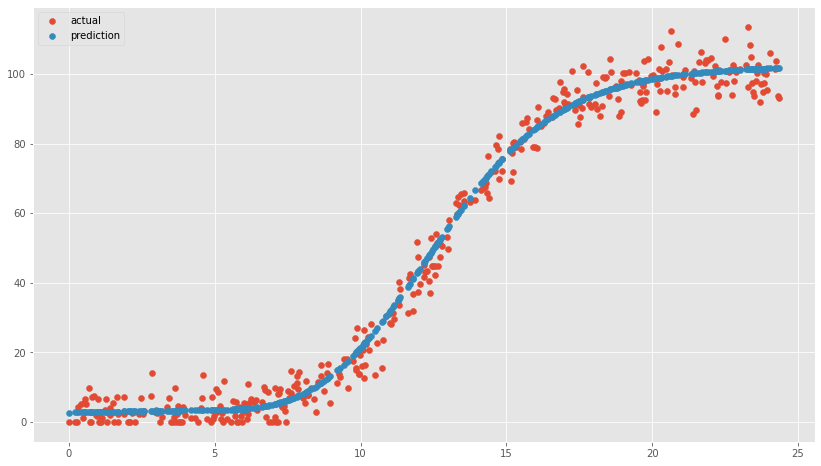

In [9]:
# Now let's see.
plt.scatter(train_x, train_y, label='actual')
plt.scatter(train_x, m.predict(train_x), label='prediction')
plt.legend();

In [10]:
# Take four hand-picked values and see their predictions.
m.predict([1.0,5.0,10.0,15.0, 20.0])

array([[ 2.882759 ],
       [ 3.4328802],
       [21.338326 ],
       [76.8146   ],
       [98.53489  ]], dtype=float32)

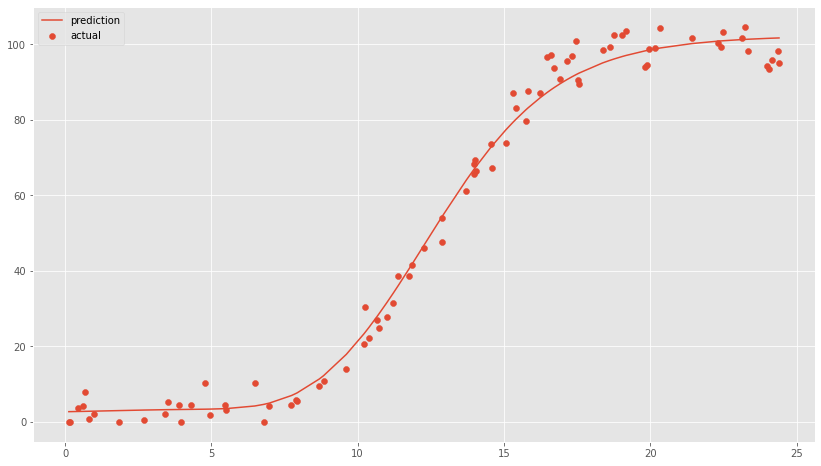

In [11]:
# Let's plot our predictions of the x values we kept for testing
plt.scatter(test_x, test_y, label='actual')
plt.plot(test_x, m.predict(test_x), label='prediction')
plt.legend();

In [12]:
# Evaluate the neural network on the test data.
m.evaluate(test_x, test_y)

3/3 [==============================] - 0s 5ms/step - loss: 15.7581


15.758143424987793

### End

In [13]:
# create a new neural network
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
# dense: everything in current layer connected to every thing in previous layer
# 1: number of neurons in the layer
# input_dim=1  number of dimensions in input is 1 (1 input)
# linear activation function
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model.
# bog standard to optimize - optimizer="sgd"
# loss="mean_squared_error" ... cost function
m.compile(loss="mean_squared_error", optimizer="sgd")

In [14]:
# Create some input values.
x = np.arange(-10.0, 10.1, 1.0)

# Run each x value through the neural network.
y = m.predict(x)

In [15]:
# Have a look at x.
x

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [16]:
y

array([[-10.],
       [ -9.],
       [ -8.],
       [ -7.],
       [ -6.],
       [ -5.],
       [ -4.],
       [ -3.],
       [ -2.],
       [ -1.],
       [  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.]], dtype=float32)

In [17]:
m.layers[0].weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [18]:
m


In [20]:
x = m.predict([5])
x.shape

(1, 1)

In [21]:
x

array([[5.]], dtype=float32)